

*   before running the code - ensure that kaggle.json file should be present in in your[any location]
  ----it can be downloaded from kaggle




In [1]:
!pip3 install kaggle
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "content/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
  status, done = downloader.next_chunk()
  print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)


!mkdir ~/.kaggle
!cp /content/content/kaggle.json ~/.kaggle/kaggle.json

!mkdir data
!kaggle competitions download -c retail-case-study-b7 -p data

Download 100%.
  0% 0.00/329k [00:00<?, ?B/s]
100% 329k/329k [00:00<00:00, 44.9MB/s]
  0% 0.00/5.31k [00:00<?, ?B/s]
100% 5.31k/5.31k [00:00<00:00, 5.66MB/s]
  0% 0.00/793 [00:00<?, ?B/s]
100% 793/793 [00:00<00:00, 817kB/s]
  0% 0.00/309 [00:00<?, ?B/s]
100% 309/309 [00:00<00:00, 291kB/s]
  0% 0.00/17.4k [00:00<?, ?B/s]
100% 17.4k/17.4k [00:00<00:00, 15.8MB/s]
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 13.7MB/s]
  0% 0.00/10.2k [00:00<?, ?B/s]
100% 10.2k/10.2k [00:00<00:00, 11.2MB/s]


In [3]:
!mkdir ../input/
!kaggle competitions download -c retail-case-study-b7 -p ../input/

  0% 0.00/329k [00:00<?, ?B/s]
100% 329k/329k [00:00<00:00, 45.9MB/s]
  0% 0.00/5.31k [00:00<?, ?B/s]
100% 5.31k/5.31k [00:00<00:00, 4.31MB/s]
  0% 0.00/793 [00:00<?, ?B/s]
100% 793/793 [00:00<00:00, 642kB/s]
  0% 0.00/309 [00:00<?, ?B/s]
100% 309/309 [00:00<00:00, 172kB/s]
  0% 0.00/17.4k [00:00<?, ?B/s]
100% 17.4k/17.4k [00:00<00:00, 14.7MB/s]
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 12.9MB/s]
  0% 0.00/10.2k [00:00<?, ?B/s]
100% 10.2k/10.2k [00:00<00:00, 9.18MB/s]


In [1]:
!ls ../input/

AttributesDescription.xlsx  Sample_Submission.csv  WeatherData.xlsx
Events_HolidaysData.xlsx    Test_Kaggle.csv
MacroEconomicData.xlsx	    Train_Kaggle.csv


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

%matplotlib inline

import math, time, random, datetime

# Data Manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier


## Importing required packages
import string
import random
import re
import torch
import torch.nn as nn
from torch.autograd import Variable
import os


# Lets ignore the warnings for now
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

print(os.listdir("../input"))

trainPD = pd.read_csv('../input/Train_Kaggle.csv')
testPD  = pd.read_csv('../input/Test_Kaggle.csv')
sampleSubPD  = pd.read_csv('../input/Sample_Submission.csv')

attDescPD = pd.read_excel('../input/AttributesDescription.xlsx')
eventHolidaysPD = pd.read_excel('../input/Events_HolidaysData.xlsx')
macroEconomicsPD = pd.read_excel('../input/MacroEconomicData.xlsx')

['Train_Kaggle.csv', 'Test_Kaggle.csv', 'Events_HolidaysData.xlsx', 'WeatherData.xlsx', 'Sample_Submission.csv', 'MacroEconomicData.xlsx', 'AttributesDescription.xlsx']


In [5]:
trainPD.dtypes

Year                           int64
Month                          int64
ProductCategory               object
Sales(In ThousandDollars)    float64
dtype: object

In [6]:
print("train shape=", trainPD.shape)
print("ProductCategory unique values=", trainPD.ProductCategory.unique() )
trainPD.head()

train shape= (216, 4)
ProductCategory unique values= ['WomenClothing' 'MenClothing' 'OtherClothing']


,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [7]:
print("test shape=", testPD.shape)
print("ProductCategory unique values=", testPD.ProductCategory.unique() )
testPD.head()

test shape= (36, 4)
ProductCategory unique values= ['WomenClothing' 'MenClothing' 'OtherClothing']


,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2015,1,WomenClothing,NaN
1,2015,1,MenClothing,NaN
2,2015,1,OtherClothing,NaN
3,2015,2,WomenClothing,NaN
4,2015,2,MenClothing,NaN


In [8]:
print("shape=", attDescPD.shape)
print("AttributeName unique values=", attDescPD.AttributeName.unique())
print("Type unique values=", attDescPD.Type.unique())
attDescPD.head()

shape= (4, 3)
AttributeName unique values= ['Year' 'Month' 'ProductCategory' 'Sales(In ThousandDollars)']
Type unique values= ['temporal' 'categorical' 'numeric']


,AttributeName,Type,Description
0,Year,temporal,Year
1,Month,temporal,Month
2,ProductCategory,categorical,"Clothing Products category - WomenClothing, Me..."
3,Sales(In ThousandDollars),numeric,Value of the sales or revenue in thousand dollars


In [9]:
print("shape=", eventHolidaysPD.shape, "\n")
print("Event unique values=", eventHolidaysPD.Event.unique(), "\n")
print("DayCategory unique values=", eventHolidaysPD.DayCategory.unique(), "\n")
eventHolidaysPD.head()

shape= (150, 4) 

Event unique values= ["New Year's Day" 'Martin Luther King Jr. Day' "Valentine's Day"
 "Presidents' Day" 'Easter Sunday' "Mother's Day" 'Memorial Day'
 "Father's Day" "'Independence Day' observed" 'Independence Day'
 'Labor Day' 'Columbus Day (Most regions)' 'Halloween' 'Veterans Day'
 'Thanksgiving Day' 'Christmas Eve' 'Christmas Day' "New Year's Eve"
 "'Christmas Day' observed" "'New Year's Day' observed" 'Election Day'
 "Thomas Jefferson's Birthday" 'Day After Christmas Day'] 

DayCategory unique values= ['Federal Holiday' 'Event'] 



,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


In [10]:
print("shape=", macroEconomicsPD.shape, "\n")
macroEconomicsPD.head()

shape= (96, 18) 



,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [11]:
print("SAMPLE SUBMISSION shape=", sampleSubPD.shape)
sampleSubPD.head()

SAMPLE SUBMISSION shape= (36, 2)


,Year,Sales(In ThousandDollars)
0,1,1000
1,2,1000
2,3,1000
3,4,1000
4,5,1000


**NAME OF Data Frame Variables:**
* trainPD
* testPD
* sampleSubPD
* attDescPD
* eventHolidaysPD
* macroEconomicsPD

In [12]:
trainPD.describe()

,Year,Month,Sales(In ThousandDollars)
count,216.000000,216.000000,204.000000
mean,2011.500000,6.500000,1702.352941
std,1.711792,3.460071,1253.333110
min,2009.000000,1.000000,471.000000
25%,2010.000000,3.750000,710.750000
50%,2011.500000,6.500000,1080.500000
75%,2013.000000,9.250000,2750.750000
max,2014.000000,12.000000,5664.000000


In [13]:
testPD.describe()

,Year,Month,Sales(In ThousandDollars)
count,36.0,36.00000,0.0
mean,2015.0,6.50000,NaN
std,0.0,3.50102,NaN
min,2015.0,1.00000,NaN
25%,2015.0,3.75000,NaN
50%,2015.0,6.50000,NaN
75%,2015.0,9.25000,NaN
max,2015.0,12.00000,NaN


In [14]:
sampleSubPD.describe()

,Year,Sales(In ThousandDollars)
count,36.000000,36.0
mean,18.500000,1000.0
std,10.535654,0.0
min,1.000000,1000.0
25%,9.750000,1000.0
50%,18.500000,1000.0
75%,27.250000,1000.0
max,36.000000,1000.0


In [15]:
attDescPD.describe()

,AttributeName,Type,Description
count,4,4,4
unique,4,3,4
top,ProductCategory,temporal,"Clothing Products category - WomenClothing, Me..."
freq,1,2,1


In [16]:
eventHolidaysPD.describe()

,Year
count,150.000000
mean,2012.540000
std,2.324743
min,2009.000000
25%,2010.250000
50%,2012.500000
75%,2015.000000
max,2016.000000


In [17]:
macroEconomicsPD.describe()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,16490.078125,15548.932194,252.372552,7.442708,12.519479,10.447604,23.793229,91.034479,0.615521,10.647698,8.851885,791.843750,14.616010,3.556104,11.061615
std,1427.554038,773.076316,9.290857,1.766397,0.722375,0.560651,1.147167,33.613974,6.919387,1.728418,1.102847,25.753621,2.007579,0.158263,1.710573
min,14317.372922,14345.676097,233.402000,4.600000,11.820000,9.450000,21.960000,51.500000,-23.590000,8.398000,7.345000,747.000000,11.751000,3.275000,8.500000
25%,15210.701514,14919.668252,242.474500,5.675000,11.950000,10.030000,22.797500,70.377500,-2.400000,9.296000,7.586000,772.750000,12.551000,3.410000,9.742500
50%,16422.454368,15442.996869,254.680500,7.750000,12.220000,10.470000,23.800000,83.905000,0.350000,10.260500,9.156500,790.000000,14.959000,3.572500,10.637500
75%,17772.032416,16262.237629,260.381500,9.000000,13.057500,10.940000,24.772500,93.322500,3.482500,11.412250,9.654500,807.000000,16.250000,3.675000,11.493750
max,19015.393408,16918.050624,265.421000,10.000000,14.260000,11.440000,26.040000,229.670000,22.850000,14.431000,10.577000,869.000000,18.375000,4.170000,15.280000


**Missing Values** - from the describe of the train dataset - we see that there are onyl 204 sales data out of 216 - meaning there are some missing values.

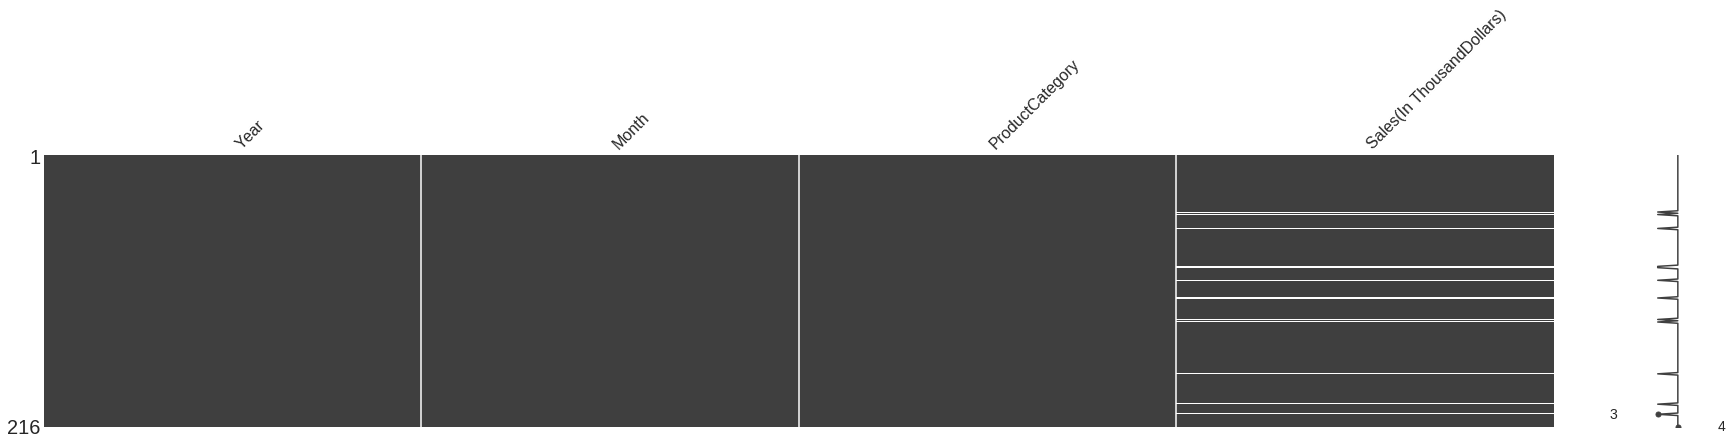

In [20]:
missingno.matrix(trainPD, figsize=(30, 5))

In [21]:
def find_missing_values(df, columns):
    missing_vals = {}
    print("Number of missing values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length - total_column_values
    return missing_vals

missing_values = find_missing_values(trainPD, columns=trainPD.columns)
print(missing_values)

Number of missing values for each column:
{'Year': 0, 'Month': 0, 'ProductCategory': 0, 'Sales(In ThousandDollars)': 12}


In [22]:
trainPD.dtypes

Year                           int64
Month                          int64
ProductCategory               object
Sales(In ThousandDollars)    float64
dtype: object

12    18
11    18
10    18
9     18
8     18
7     18
6     18
5     18
4     18
3     18
2     18
1     18
Name: Month, dtype: int64


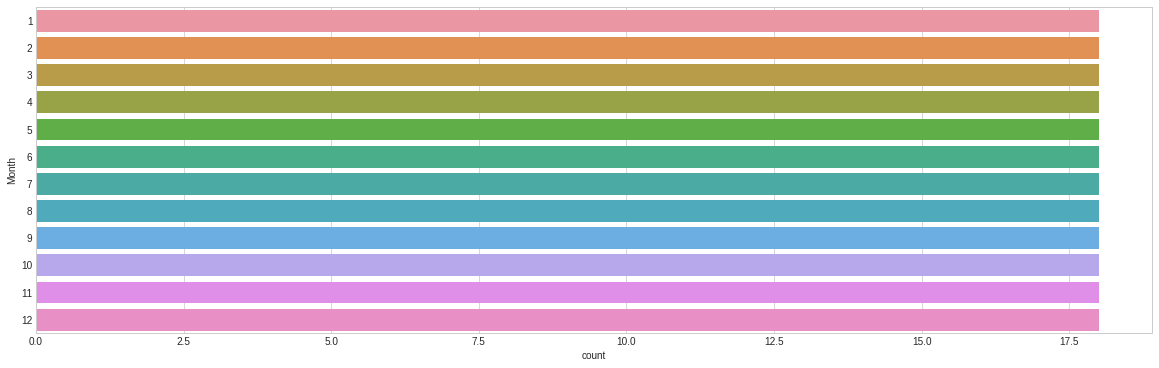

In [23]:
fig = plt.figure(figsize=(20,6))
sns.countplot(y='Month', data = trainPD)
print(trainPD.Month.value_counts())

MenClothing      72
OtherClothing    72
WomenClothing    72
Name: ProductCategory, dtype: int64


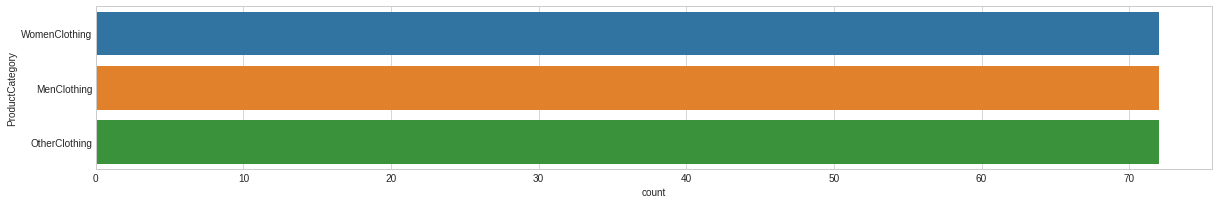

In [24]:
fig = plt.figure(figsize=(20,3))
sns.countplot(y='ProductCategory', data = trainPD)
print(trainPD.ProductCategory.value_counts())

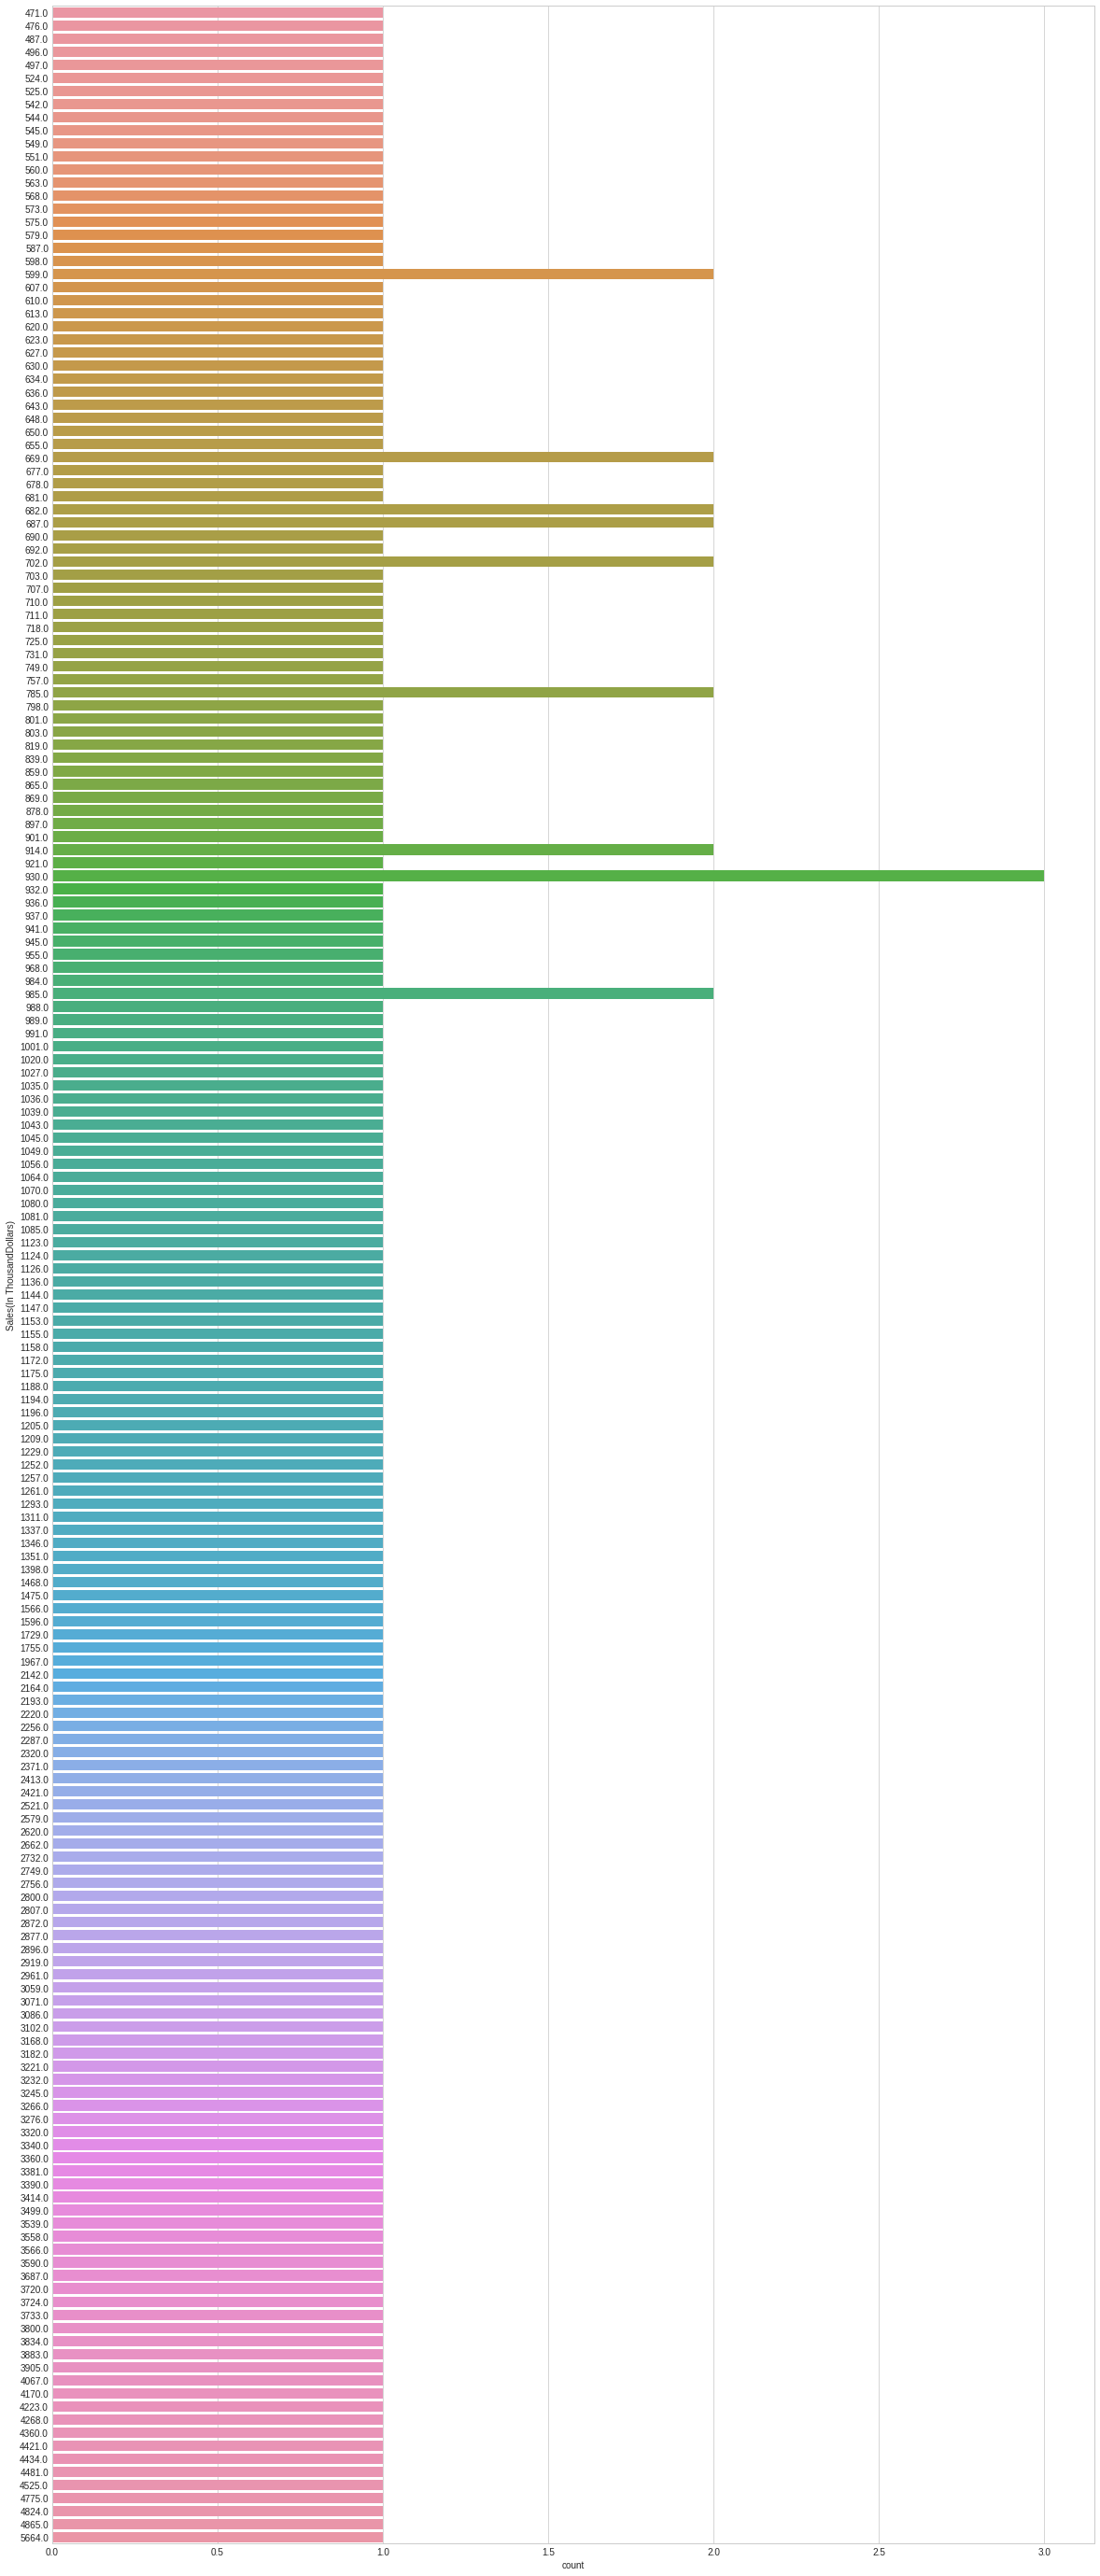

In [25]:
fig = plt.figure(figsize=(20,50))
sns.countplot(y='Sales(In ThousandDollars)', data = trainPD)
# print(trainPD['Sales(In ThousandDollars)'].value_counts())

Federal Holiday    88
Event              62
Name: DayCategory, dtype: int64


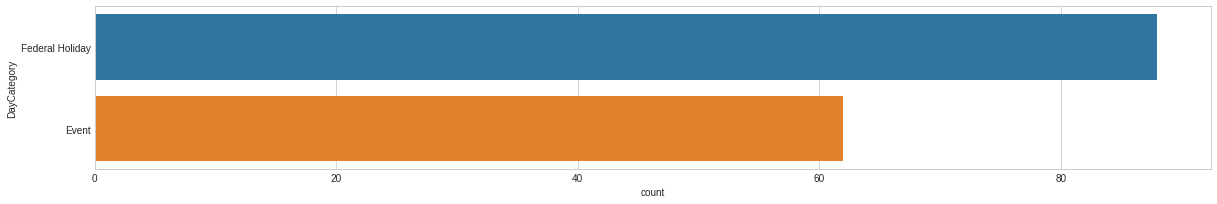

In [26]:
fig = plt.figure(figsize=(20,3))
sns.countplot(y='DayCategory', data = eventHolidaysPD)
print(eventHolidaysPD.DayCategory.value_counts())

Federal Holiday    88
Event              62
Name: DayCategory, dtype: int64


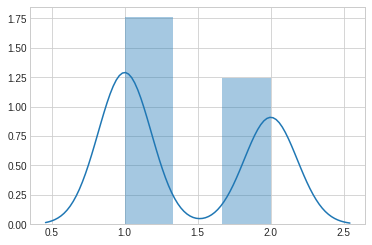

In [27]:
# eventHolidaysPD.DayCategory has to be converted into numric to make the next line work
# sns.distplot(eventHolidaysPD.DayCategory) 
print(eventHolidaysPD.DayCategory.value_counts())
DayCategory = {'Federal Holiday': 1,'Event': 2}
eventHolidaysPD.DayCategoryTMP = [DayCategory[item] for item in eventHolidaysPD.DayCategory] 
sns.distplot(eventHolidaysPD.DayCategoryTMP) 


In [28]:
trainPD.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [29]:
trainPDTemp = trainPD.apply(LabelEncoder().fit_transform)
trainPDTemp.head(15)

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,0,0,2,125
1,0,0,0,5
2,0,0,1,68
3,0,1,2,124
4,0,1,0,3
5,0,1,1,58
6,0,2,2,131
7,0,2,0,7
8,0,2,1,65
9,0,3,2,140


In [0]:
# Split the data into train and test
X_train = trainPDTemp.drop('Sales(In ThousandDollars)', axis = 1)
y_train = trainPDTemp['Sales(In ThousandDollars)']


In [0]:
# function that runs the requested algorithm and returns the accuracy metrics

def fit_ml_algo(algo, X_train, y_train, cv):
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train)*100, 2)
    
#     Cross Validation
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv = cv, n_jobs=-1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100, 2)
    
#     train_pred = []
#     acc_cv = 0
    return train_pred, acc, acc_cv

In [32]:
# Logistic Regression
start_time = time.time()
# train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train, y_train, 10)
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train, y_train, 2)
log_time = time.time() - start_time
print("Accuracy: %s" % acc_log)
print("Accuracy CV: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))


Accuracy: 5.56
Accuracy CV: 1.85
Running Time: 0:00:01.834625


In [33]:
# KNN
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), X_train, y_train, 2)
knn_time = time.time() - start_time
print("Accuracy: %s" % acc_knn)
print("Accuracy CV: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))


Accuracy: 4.17
Accuracy CV: 0.46
Running Time: 0:00:00.078366


In [34]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gnb, acc_gnb, acc_cv_gnb = fit_ml_algo(GaussianNB(), X_train, y_train, 2)
gnb_time = time.time() - start_time
print("Accuracy: %s" % acc_gnb)
print("Accuracy CV: %s" % acc_cv_gnb)
print("Running Time: %s" % datetime.timedelta(seconds=gnb_time))


Accuracy: 98.15
Accuracy CV: 0.93
Running Time: 0:00:00.067352


In [35]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(), X_train, y_train, 2)
svc_time = time.time() - start_time
print("Accuracy: %s" % acc_svc)
print("Accuracy CV: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

Accuracy: 12.04
Accuracy CV: 1.39
Running Time: 0:00:01.234191


In [36]:
# SGD
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), X_train, y_train, 2)
sgd_time = time.time() - start_time
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 3.7
Accuracy CV: 0.93
Running Time: 0:00:00.142755


In [37]:
# Decision Tree
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), X_train, y_train, 2)
dt_time = time.time() - start_time
print("Accuracy: %s" % acc_dt)
print("Accuracy CV: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV: 1.39
Running Time: 0:00:00.044713


In [38]:
train_pred_dt

array([ 20,  20,  20,  20,  20,  20,  38,  38,  38,  75,  34,  75,  75,
        34,  75,  75,  34,  75,  75,  34,  75,  75,  34,  75,  64,  34,
        64,  64,  34,  72,  64,  34,  64,  64,  34,  64,  20,  20,  20,
        20,  20,  20,  38,  38,  38,  75,  34,  75,  75,  34,  75,  75,
        34,  75,  75,  34,  75,  75,  34,  75,  64,  34,  64,  64,  34,
        64,  64,  76,  64,  64,  34,  64,  20,  20,  20,  20,  20,  20,
        38,  38,  38,  75,  34,  75,  75,  34,  75,  75,  34,  75,  75,
        34, 198,  75,  34,  75,  66,  34,  79,  66,  34,  66,  66,  34,
        66,  66,  34,  66,  20,  20,  20,  20,  20,  20,  38,  38,  38,
        75,  39,  75,  75,  39,  75,  75,  39,  75,  75,  39,  75,  75,
        39,  75,  66,  39,  66,  66,  39,  66,  66,  39,  66,  66,  39,
        66,  20,   6,  20,  20,  20,  20,  38,  47,  38,  75,  39,  75,
        75,  39,  75,  75,  39,  75,  75,  39,  75,  75,  31,  75,  66,
        39,  66,  66,  39,  66,  66,  39,  66,  66,  39,  66,  2

In [39]:
# Gradient Boosting Descent
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), X_train, y_train, 2)
gbt_time = time.time() - start_time
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 97.69
Accuracy CV: 0.93
Running Time: 0:00:51.827308


Now we know few algorithm in ML for regression we can use based on our problem:

* Lasso Regression
* Ridge Regression
* Elastic Net
* Decision Trees
* Random Forest
* GBM
* Light GBM
* XGboost
* Adaboost
* Neural Networks

In [40]:
trainPD.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [0]:
# # trainPDTemp = trainPD.apply(LabelEncoder().fit_transform)

# df['ProductCategory'] = LabelEncoder().fit_transform(df['ProductCategory'])
# from sklearn.impute import SimpleImputer
# my_imputer = SimpleImputer()
# train_imputed_PD = my_imputer.fit_transform(trainPD)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

def processDataForModelling(data,target,drop_cols,is_train=True,split=0.25):
    
    data['ProductCategory'] = LabelEncoder().fit_transform(data['ProductCategory'])
    
    data_1=data.drop(drop_cols,axis=1)
    # One hot Encoding
    data_1=pd.get_dummies(data_1)
    if is_train==True:
        my_imputer = SimpleImputer()
        x = my_imputer.fit_transform(data_1)
        data_1 = pd.DataFrame({'Year':x[:,0],'Month':x[:,1], 'ProductCategory':x[:,2],'Sales(In ThousandDollars)':x[:,3]})
        X=data_1.drop([target],axis=1)
        y=data_1[target]
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=split,random_state=123)
        
        print("Shape of Training Features",X_train.shape)
        print("Shape of Validation Features ",X_test.shape)
        
        return X_train, X_test, y_train, y_test
    else:
        print ("Shape of Test Data",data_1.shape)
        return data_1

X_train, X_val, y_train, y_val=processDataForModelling(trainPD,'Sales(In ThousandDollars)',drop_cols=[],is_train=True,split=0.2)

Shape of Training Features (172, 3)
Shape of Validation Features  (44, 3)


In [19]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 883,n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_val)
rf_rmse=np.sqrt(mean_squared_error(rf_pred, y_val))
print("RMSE for Random Forest is ",rf_rmse)

RMSE for Random Forest is  272.8300492202536


In [43]:
rf_pred

array([3662.94705882, 4230.54      ,  644.89      , 1144.18058824,
       2976.94352941, 3901.5       , 1169.67647059,  821.47294118,
       1307.96117647,  749.26705882, 1315.78941176,  594.16705882,
       1323.34352941, 1286.18647059,  937.32352941, 1242.62352941,
        729.88764706,  682.36      , 1365.03352941,  970.67647059,
        778.40117647, 1283.94      , 1153.25      , 1470.44      ,
        508.03      , 1179.86647059,  588.96352941, 3973.34      ,
       1425.72294118, 3491.01      , 1139.79      , 2254.15      ,
        812.02647059, 1164.96882353, 3183.62      , 2364.62      ,
       4349.86352941, 1223.54058824,  629.33      , 2435.74529412,
       3191.61117647,  868.27      , 1231.95764706, 1225.28      ])

In [44]:
testPD.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2015,1,WomenClothing,NaN
1,2015,1,MenClothing,NaN
2,2015,1,OtherClothing,NaN
3,2015,2,WomenClothing,NaN
4,2015,2,MenClothing,NaN


In [45]:
test_data=processDataForModelling(testPD,'Sales(In ThousandDollars)',drop_cols=['Sales(In ThousandDollars)'],is_train=False)
test_data.head()
rf_test_pred= rf.predict(test_data)
print(rf_test_pred)

Shape of Test Data (36, 3)
[3183.62        590.93       1180.81470588 3440.21        610.7
 1233.14352941 4126.14        682.36       1286.18647059 4229.29
  778.08       1307.96117647 4323.21        788.14       1365.03352941
 4033.94        764.39764706 1529.24235294 3973.34        729.88764706
 1247.91529412 4230.54       1179.86647059 1269.65352941 4360.06
  778.40117647 1105.77352941 4349.86352941  762.94       1162.86352941
 4537.51        790.87       1345.32       5229.49       1072.35
 1760.92      ]


**xgboost**

In [20]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X_train, X_val, y_train, y_val


xgb_model = XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)

mse=mean_squared_error(y_val, y_pred)

print(np.sqrt(mse))

[07:57:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
239.73187640317715


In [31]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X_train, X_val, y_train, y_val


params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
xgb_model = XGBRegressor(random_state=42)
grid = GridSearchCV(xgb_model, params)
grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_val)
mse=mean_squared_error(y_val, y_pred)
print(np.sqrt(mse))

[10:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [46]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X_train, X_val, y_train, y_val

params = {
        'min_child_weight': [1, 4, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5]
        }
# params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
# 'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
xgb_model = XGBRegressor(random_state=10)
grid = GridSearchCV(xgb_model, params)
grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_val)
mse=mean_squared_error(y_val, y_pred)
print(np.sqrt(mse))

[11:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [21]:
y_pred

array([3463.021  , 4275.7812 ,  635.97046, 1099.8402 , 2960.5996 ,
       3692.0564 , 1011.1358 ,  655.38904, 1379.378  ,  774.08   ,
       1340.5226 ,  516.2948 , 1449.1482 , 1379.378  ,  783.12524,
       1310.5588 ,  683.2516 ,  689.5193 , 1381.4467 ,  843.4729 ,
        721.8646 , 1368.8575 , 1203.5167 , 1603.2423 ,  396.3402 ,
       1004.7204 ,  684.12396, 3951.508  , 1340.5226 , 3573.6758 ,
       1070.4224 , 2391.0872 ,  685.99963, 1127.8672 , 2848.2786 ,
       2255.0872 , 4169.6104 , 1207.2667 ,  574.0035 , 2767.1035 ,
       3022.7432 ,  838.3557 ,  939.0178 , 1214.5297 ], dtype=float32)

In [26]:
len(X_val)

44

In [27]:
test_data=processDataForModelling(testPD,'Sales(In ThousandDollars)',drop_cols=['Sales(In ThousandDollars)'],is_train=False)
test_data.head()
rf_test_pred= xgb_model.predict(test_data)
print(rf_test_pred)

Shape of Test Data (36, 3)
[2848.2786   506.5054  1148.0029  3388.4753   598.8236  1280.9758
 4219.75     689.5193  1379.378   4219.75     776.81006 1379.378
 4359.344    767.7853  1381.4467  4148.806    870.51874 1405.1187
 3951.508    683.2516  1199.0369  4275.7812  1004.7204  1299.0463
 4169.6104   721.8646  1170.436   4169.6104   721.8646  1170.436
 4650.338    800.1238  1408.5167  5569.681   1132.3308  1866.9056 ]


In [28]:
len(rf_test_pred)

36

In [42]:
test_data=processDataForModelling(testPD,'Sales(In ThousandDollars)',drop_cols=['Sales(In ThousandDollars)'],is_train=False)
test_data.head()
rf_test_pred= grid.best_estimator_.predict(test_data)
print(rf_test_pred)

Shape of Test Data (36, 3)
[3328.631    432.60925 1091.4004  3598.3018   559.1259  1217.9169
 4254.8257   764.9077  1418.3717  4254.8257   805.2998  1418.3717
 4413.132    850.4485  1438.1476  4198.875    901.2696  1449.5974
 4009.3914   740.23364 1232.7622  4079.6023   875.5811  1368.1096
 4040.8247   719.5922  1220.4058  4040.8247   734.77167 1235.5852
 4483.6074   855.7551  1419.9948  5498.939   1159.37    1772.0593 ]


In [37]:
print(rf_test_pred)

[3328.631    432.60925 1091.4004  3598.3018   559.1259  1217.9169
 4254.8257   764.9077  1418.3717  4254.8257   805.2998  1418.3717
 4413.132    850.4485  1438.1476  4198.875    901.2696  1449.5974
 4009.3914   740.23364 1232.7622  4079.6023   875.5811  1368.1096
 4040.8247   719.5922  1220.4058  4040.8247   734.77167 1235.5852
 4483.6074   855.7551  1419.9948  5498.939   1159.37    1772.0593 ]


**Subimission**

In [46]:
# create a submission dataframe and append the relevant columns
submission = pd.DataFrame()
submission['Year'] = testPD['Year']
submission['Sales(In ThousandDollars)'] = rf_test_pred
submission.head()


,Year,Sales(In ThousandDollars)
0,2015,3183.620000
1,2015,590.930000
2,2015,1180.814706
3,2015,3440.210000
4,2015,610.700000


In [47]:
# check if submission and test dateframe are of same length
if len(submission) == len(testPD):
    print('Submission dataframe is the same length as test ({} rows)'.format(len(submission)))
else:
    print("Dataframe mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (36 rows)


In [48]:
# make a csv file for the submission
submission.to_csv('catboost_submission.csv', index = False)
print('Submission is ready')

Submission is ready


In [49]:
submissions_check = pd.read_csv('submission_1.csv')
submissions_check.head()

,Year,Sales(In ThousandDollars)
0,2015,3183.620000
1,2015,590.930000
2,2015,1180.814706
3,2015,3440.210000
4,2015,610.700000


In [0]:
# import the modules we'll need
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe
create_download_link(submission)


In [39]:
xxx = [int(round(each)) for each in rf_test_pred]
print(xxx)

[3329, 433, 1091, 3598, 559, 1218, 4255, 765, 1418, 4255, 805, 1418, 4413, 850, 1438, 4199, 901, 1450, 4009, 740, 1233, 4080, 876, 1368, 4041, 720, 1220, 4041, 735, 1236, 4484, 856, 1420, 5499, 1159, 1772]


In [43]:
# create a submission dataframe and append the relevant columns
submission = pd.DataFrame()
submission['Year'] = [each for each in range(1, 37)]
submission['Sales(In ThousandDollars)'] = rf_test_pred
submission.head()

# make a csv file for the submission
submission.to_csv('xgboost_without_merge2222.csv', index = False)
print('Submission is ready')

Submission is ready
